In [95]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [96]:
# Step 1: Load the dataset
Hw1_data = pd.read_csv('HW1_house_data(1).csv')

In [97]:
Hw1_data.describe()

,area,price
count,100.00000,100.000000
mean,2247.97960,562990.340700
std,453.86445,113464.467239
min,1522.16000,381657.070000
25%,1812.84750,454164.525000
50%,2284.15000,571887.305000
75%,2617.72750,655407.227500
max,2995.40000,749686.490000


In [98]:
Hw1_data.head()

,area,price
0,2231.88,558852.17
1,2524.92,632260.29
2,1527.65,382994.25
3,1986.09,497607.86
4,2920.16,730870.84


In [99]:
Hw1_data.tail()

,area,price
95,2345.42,587342.25
96,1701.95,426321.81
97,2880.39,721159.46
98,2273.60,569238.36
99,2923.85,732054.33


In [100]:
Hw1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    100 non-null    float64
 1   price   100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [101]:
X = Hw1_data['area'].values
y = Hw1_data['price'].values

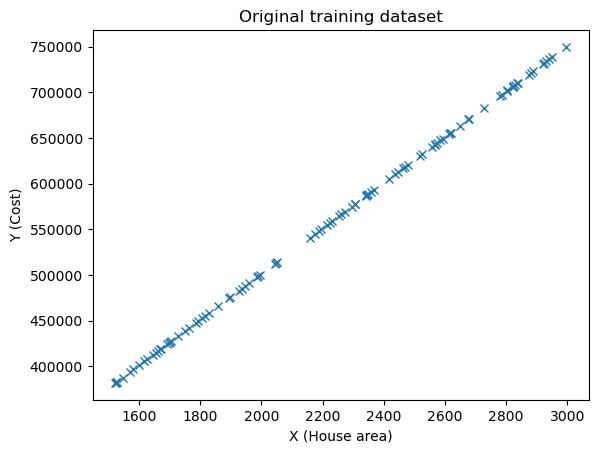

In [102]:
plt.plot(X, y, 'x')
plt.title("Original training dataset")
plt.xlabel("X (House area)")
plt.ylabel("Y (Cost)")
plt.show()


In [103]:
# Normalizing x
Xnormalized = (X - X.mean()) / X.std()

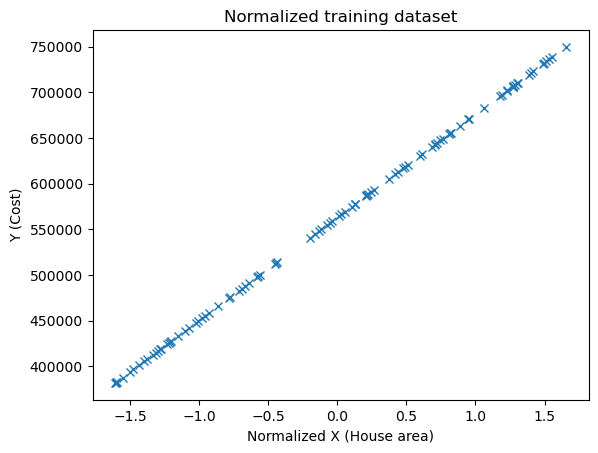

In [104]:
plt.plot(Xnormalized, y, 'x')  # Plot the normalized data
plt.title("Normalized training dataset")
plt.xlabel("Normalized X (House area)")
plt.ylabel("Y (Cost)")
plt.show()

In [105]:
LearningRate = 0.01
iterations = 1000
theta0 = 0
theta1 = 0
m = len(y)

In [106]:
for _ in range(iterations):
    yPred = theta0 + theta1 * Xnormalized
    gradient_theta0 = (1 / m) * np.sum(yPred - y)
    gradient_theta1 = (1 / m) * np.sum((yPred - y) * Xnormalized)  
    theta0 -= LearningRate * gradient_theta0
    theta1 -= LearningRate * gradient_theta1

In [107]:
print("Gradient Descent Theta0:", theta0)
print("Gradient Descent Theta1:", theta1)

Gradient Descent Theta0: 562966.0357047117
Gradient Descent Theta1: 112890.79348255106


In [108]:
areaPredict = 2000
normalizedArea = (areaPredict - X.mean()) / X.std()
ypred = theta0 + theta1 * normalizedArea
print("Gradient Descent prediction: " , ypred)

Gradient Descent prediction:  500974.7396107308


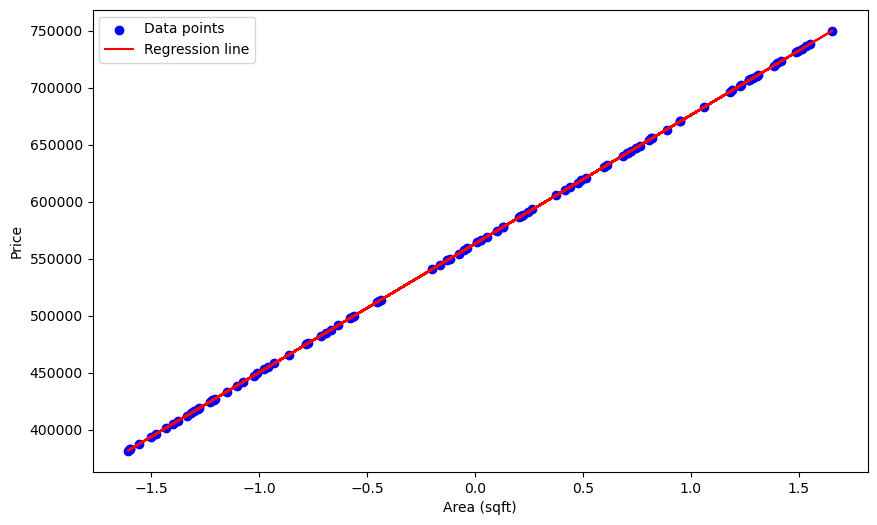

In [109]:
# Step 8: Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(Xnormalized, y, marker='o', color='blue', label='Data points')
plt.plot(Xnormalized, theta0 + theta1 * Xnormalized, color='red', label='Regression line')
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.legend()
plt.show()

In [110]:
model = LinearRegression()
Xnormalized = Xnormalized.reshape(-1, 1)

In [111]:
model.fit(Xnormalized, y)

LinearRegression()

In [112]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: 562990.3407000001
Coefficient: [112895.66732934]


In [113]:
# Useing the trained model to make predictions
predictions = model.predict(normalizedArea.reshape(-1 , 1))

# Print the predictions
print("Linear Regression Predictions:", predictions)

Linear Regression Predictions: [500996.3682489]


In [114]:
#11
X_b = np.c_[np.ones(Xnormalized.shape[0]), Xnormalized]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Theta0 from Normal Equation:", theta_best[0])
print("Theta1 from Normal Equation:", theta_best[1])
predicted_price_normal_equation = theta_best[0] + theta_best[1] * normalizedArea
print("Predicted Price for an area of 2000 using Normal Equation:",predicted_price_normal_equation) 


Theta0 from Normal Equation: 562990.3407000001
Theta1 from Normal Equation: 112895.6673293369
Predicted Price for an area of 2000 using Normal Equation: 500996.36824889656
